<a href="https://colab.research.google.com/github/hanasgnt/PCVK_2024_14/blob/main/week7_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
# buat fungsi konvolusi

def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image


In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/image/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
# kernel yang digunakan - image sharpen
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [6]:
convolution2d(img_gray, kernel_sharpen, 1,2)

array([[   0.,  -47.,  -42., ..., -134., -131.,    0.],
       [ -47.,  145.,   75., ...,  273.,  385., -131.],
       [ -48.,  105.,   47., ...,  131.,  287., -136.],
       ...,
       [  -9.,   11.,   15., ...,   98.,  227., -102.],
       [ -18.,   64.,   40., ...,  130.,  305.,  -96.],
       [   0.,  -18.,  -17., ...,  -73.,  -96.,    0.]], dtype=float32)

Buat image filter untuk average filter, low pass filter, high pass filter, dan beberapa filter berikut

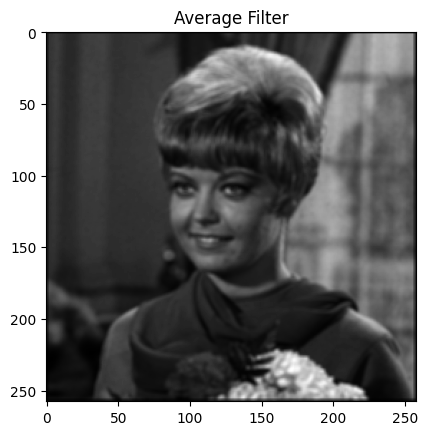

In [7]:
kernel_average = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])/9

plt.title('Average Filter')
result_avg = convolution2d(img_gray, kernel_average, 1, 2)
plt.imshow(result_avg, cmap='gray')
plt.show()

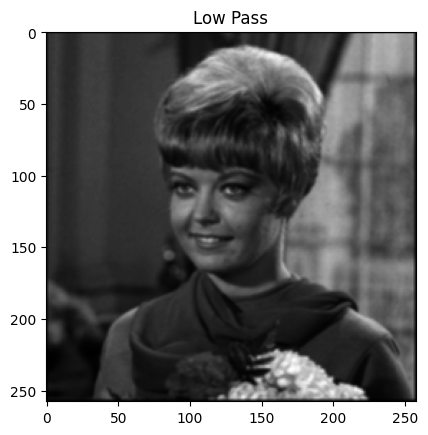

In [8]:
kernel_low_pass = np.array([[1, 1, 1],
                           [1, 4, 1],
                           [1, 1, 1]])/12

plt.title('Low Pass')
result_low_pass = convolution2d(img_gray, kernel_low_pass, 1, 2)
plt.imshow(result_low_pass, cmap='gray')
plt.show()

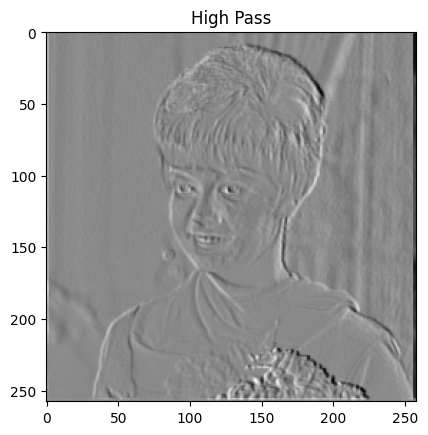

In [9]:
kernel_high_pass = np.array([[-1, 0, 1],
                           [-1, 0, 3],
                           [-3, 0, 1]])

plt.title('High Pass')
result_high_pass = convolution2d(img_gray, kernel_high_pass, 1, 2)
plt.imshow(result_high_pass, cmap='gray')
plt.show()

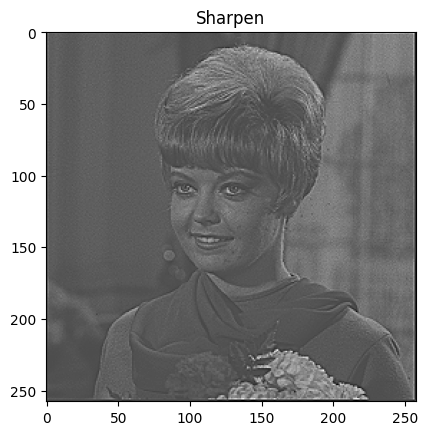

In [10]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

plt.title('Sharpen')
result_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)
plt.imshow(result_sharpen, cmap='gray')
plt.show()

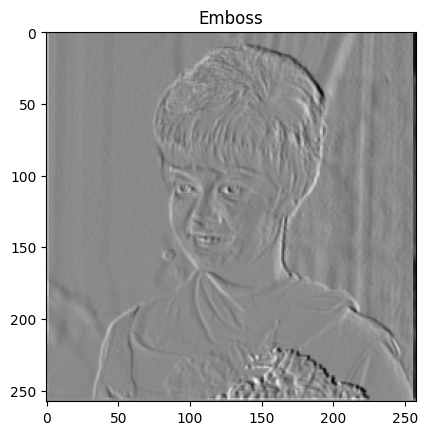

In [11]:
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])

plt.title('Emboss')
result_emboss = convolution2d(img_gray, kernel_high_pass, 1, 2)
plt.imshow(result_emboss, cmap='gray')
plt.show()

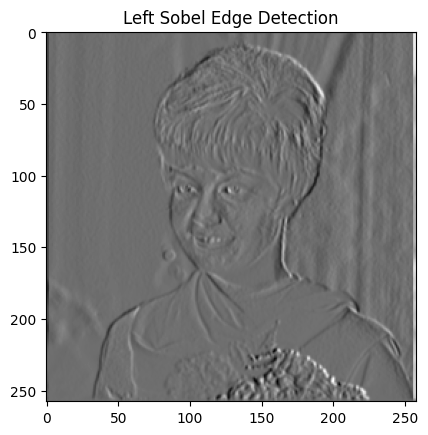

In [12]:
kernel_left_sobel_edge_detection = np.array([[1, 0, -1],
                                            [2, 0, -2],
                                            [1, 0, -1]])

plt.title('Left Sobel Edge Detection')
result_left_sobel_edge_detection = convolution2d(img_gray, kernel_left_sobel_edge_detection, 1, 2)
plt.imshow(result_left_sobel_edge_detection, cmap='gray')
plt.show()

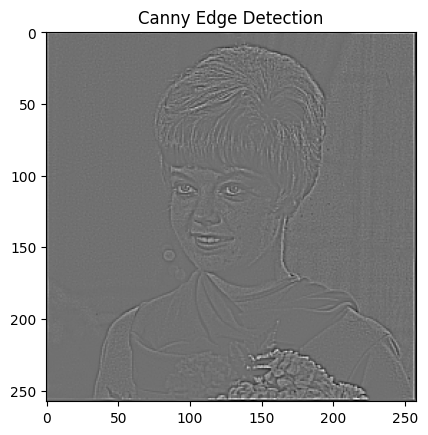

In [13]:
kernel_canny_edge_detection = np.array([[-1, -1, -1],
                                        [-1, 8, -1],
                                        [-1, -1, -1]])

plt.title('Canny Edge Detection')
result_canny_edge_detection = convolution2d(img_gray, kernel_canny_edge_detection, 1, 2)
plt.imshow(result_canny_edge_detection, cmap='gray')
plt.show()

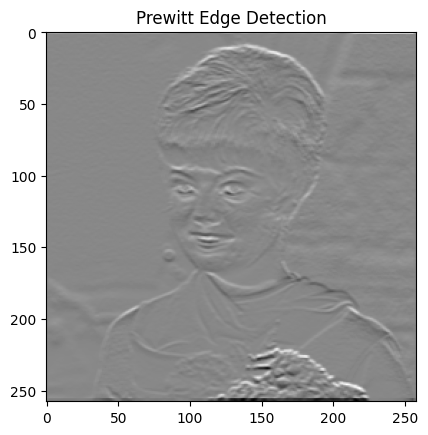

In [14]:
kernel_prewitt_edge_detection = np.array([[-1, -1, -1],
                                          [0, 0, 0],
                                          [1, 1, 1]])

plt.title('Prewitt Edge Detection')
result_prewitt_edge_detection = convolution2d(img_gray, kernel_prewitt_edge_detection, 1, 2)
plt.imshow(result_prewitt_edge_detection, cmap='gray')
plt.show()

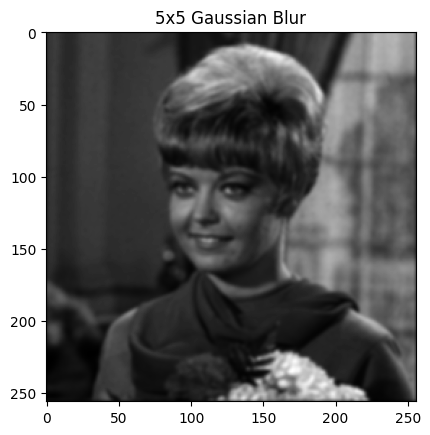

In [15]:
kernel_5_gaussian_blur = np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])/256

plt.title('5x5 Gaussian Blur')
result_5_gaussian_blur = convolution2d(img_gray, kernel_5_gaussian_blur, 1, 2)
plt.imshow(result_5_gaussian_blur, cmap='gray')
plt.show()

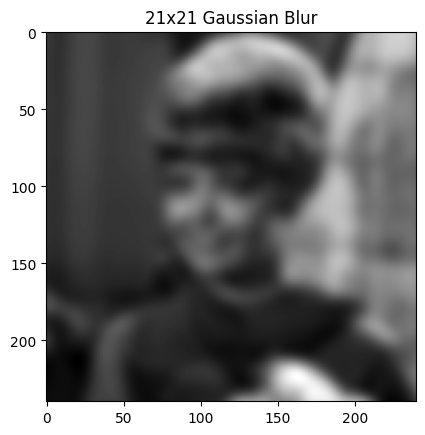

In [16]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size,sigma)
gaussian_blur_21 = gaussian_kernel @ gaussian_kernel.transpose()

plt.title('21x21 Gaussian Blur')
result_21_gaussian_blur = convolution2d(img_gray,gaussian_blur_21,1,2)
plt.imshow(result_21_gaussian_blur, cmap='gray')
plt.show()

# **E. Tugas**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

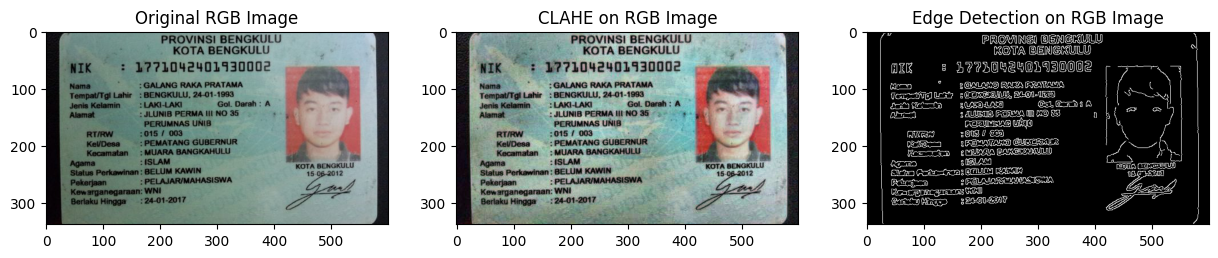

In [19]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/PCVK_2024/KTP_More/ktp1.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(image_rgb)

# Apply CLAHE to each channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
r_clahe = clahe.apply(r)
g_clahe = clahe.apply(g)
b_clahe = clahe.apply(b)

clahe_rgb_image = cv2.merge((r_clahe, g_clahe, b_clahe))

# Apply Gaussian Blur to reduce noise in the color image
blurred_rgb_image = cv2.GaussianBlur(clahe_rgb_image, (5, 5), 0)

# Convert to grayscale for edge detection
gray_blurred_rgb = cv2.cvtColor(blurred_rgb_image, cv2.COLOR_RGB2GRAY)
edges_rgb = cv2.Canny(gray_blurred_rgb, 100, 200)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')

plt.subplot(1, 3, 2)
plt.imshow(clahe_rgb_image)
plt.title('CLAHE on RGB Image')

plt.subplot(1, 3, 3)
plt.imshow(edges_rgb, cmap='gray')
plt.title('Edge Detection on RGB Image')

plt.show()